In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import gc

In [2]:
# Cargar el archivo train.csv desde la carpeta "data"
df_train = pd.read_csv("D:/proyectoICSPM/data/train.csv")
df_test = pd.read_csv("D:/proyectoICSPM/data/test.csv")
df_sub = pd.read_csv("D:/proyectoICSPM/data/sample_submission.csv")

In [3]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df_train['Gender'] = df_train['Gender'].map({'Male': 1, 'Female': 0})

In [5]:
df_train['Vehicle_Damage'] = df_train['Vehicle_Damage'].map({'Yes': 1, 'No': 0})
df_train['Vehicle_Age'] = df_train['Vehicle_Age'].map({
    '< 1 Year': 0,
    '1-2 Year': 1,
    '> 2 Years': 2
})


In [6]:
df_test.shape,df_train.shape

((127037, 11), (381109, 12))

In [40]:
df_train = df_train.drop(columns=['id'])
df_test = df_test.drop(columns=['id'])

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  int64  
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  int64  
 6   Vehicle_Damage        381109 non-null  int64  
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 32.0 MB


In [42]:
df_train.describe()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,0.540761,38.822584,0.997869,26.388807,0.458210,0.609616,0.504877,30564.389581,112.034295,154.347397,0.122563
std,0.498336,15.511611,0.046110,13.229888,0.498251,0.567439,0.499977,17213.155057,54.203995,83.671304,0.327936
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,1.000000,36.000000,1.000000,28.000000,0.000000,1.000000,1.000000,31669.000000,133.000000,154.000000,0.000000
75%,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [43]:
import seaborn as sns

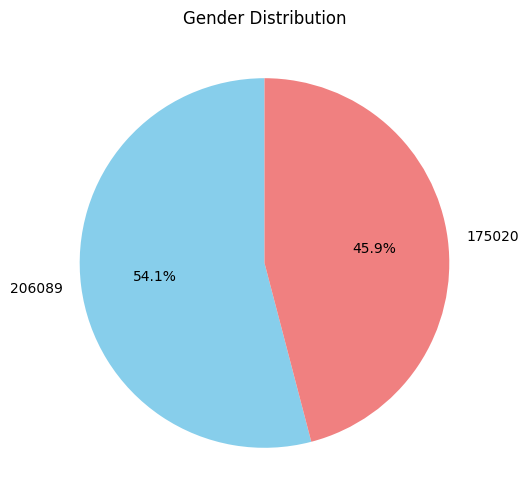

In [44]:
gender_counts = df_train['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Gender Distribution')
plt.show()

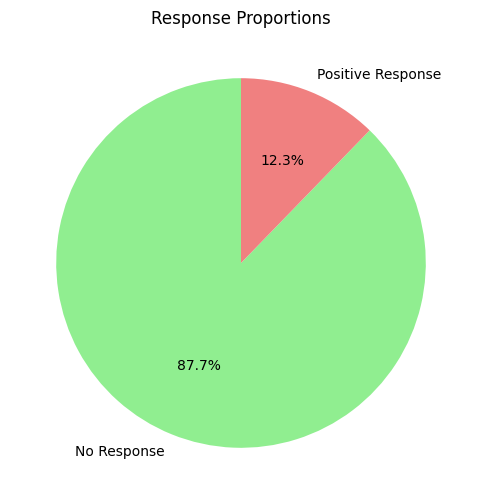

In [45]:
response_counts = df_train['Response'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(response_counts, labels=['No Response', 'Positive Response'], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=90)
plt.title('Response Proportions')
plt.show()

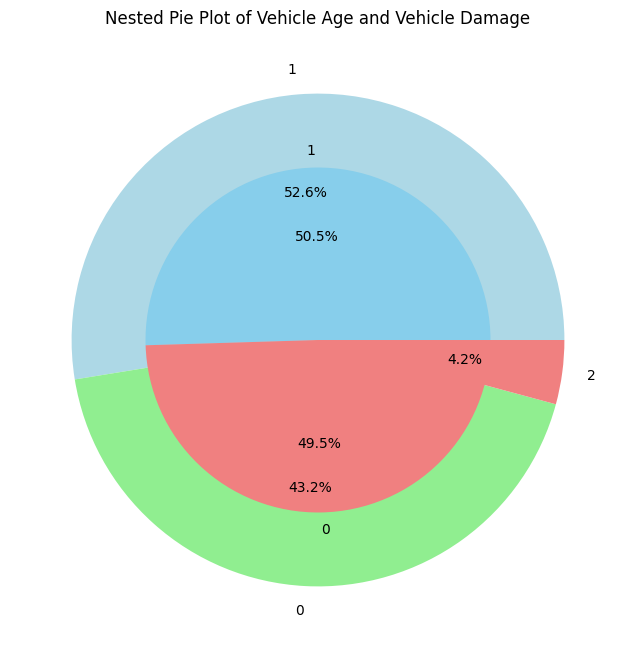

In [46]:
vehicle_age_counts = df_train['Vehicle_Age'].value_counts()
vehicle_damage_counts = df_train['Vehicle_Damage'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(vehicle_age_counts, labels=vehicle_age_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'], radius=1)
ax.pie(vehicle_damage_counts, labels=vehicle_damage_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], radius=0.7)
ax.set(aspect="equal", title='Nested Pie Plot of Vehicle Age and Vehicle Damage')
plt.show()

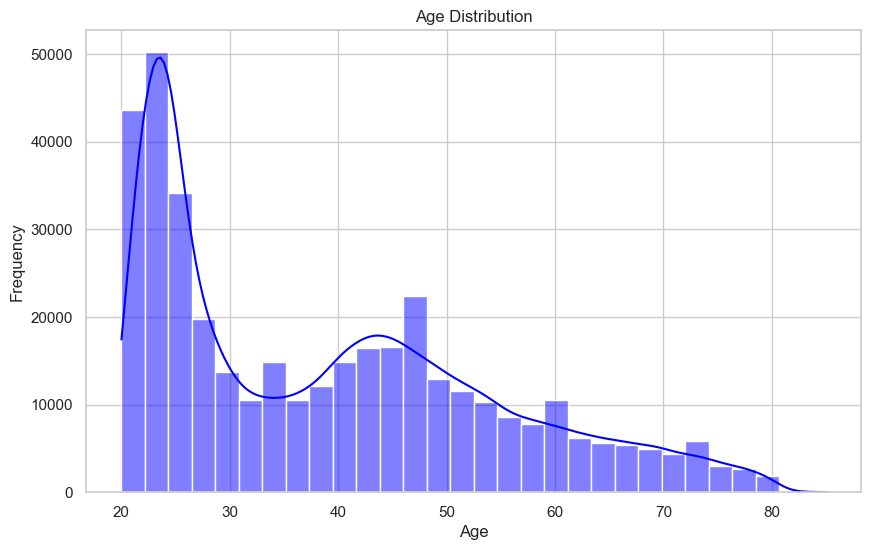

In [47]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\carlo\AppData\Local\Temp\ipykernel_252\3010167479.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Driving_License', data=df_train, palette='Set2')


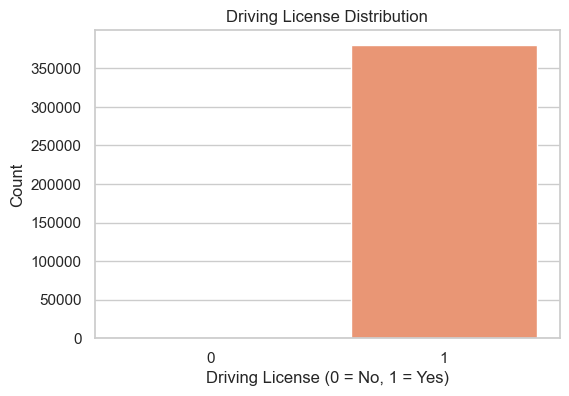

In [48]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Driving_License', data=df_train, palette='Set2')
plt.title('Driving License Distribution')
plt.xlabel('Driving License (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

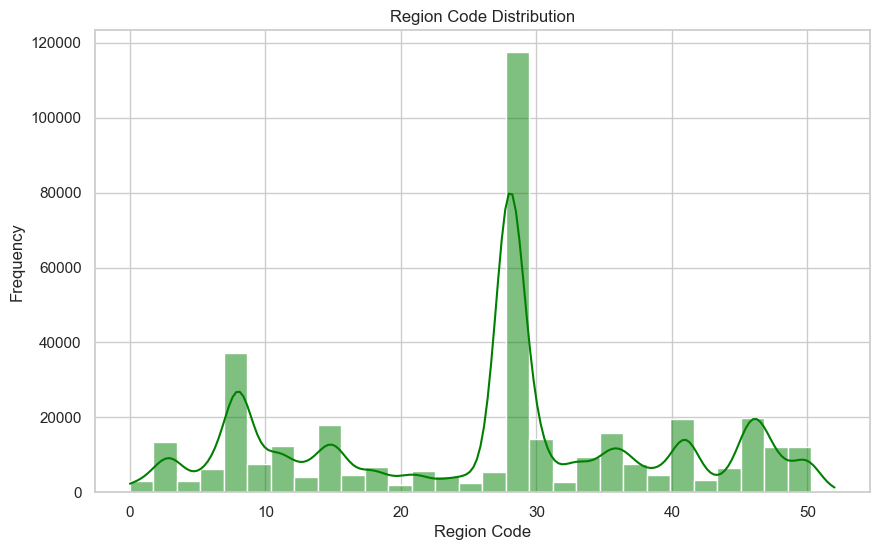

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Region_Code'], bins=30, kde=True, color='green')
plt.title('Region Code Distribution')
plt.xlabel('Region Code')
plt.ylabel('Frequency')
plt.show()

C:\Users\carlo\AppData\Local\Temp\ipykernel_252\4186524161.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Previously_Insured', data=df_train, palette='Set1')


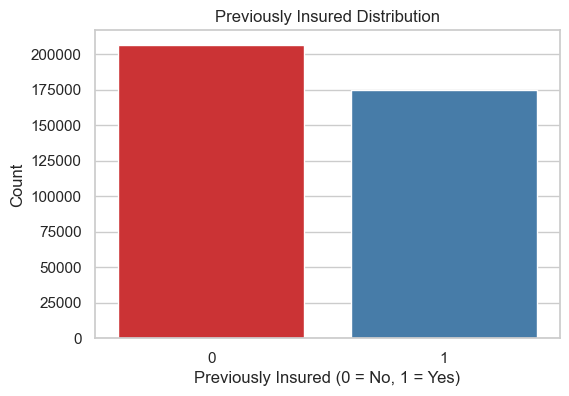

In [50]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Previously_Insured', data=df_train, palette='Set1')
plt.title('Previously Insured Distribution')
plt.xlabel('Previously Insured (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

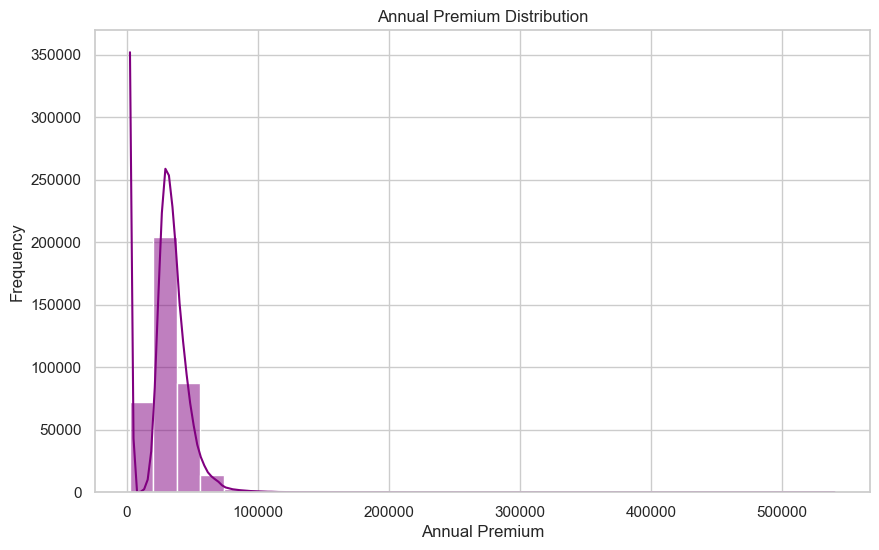

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Annual_Premium'], bins=30, kde=True, color='purple')
plt.title('Annual Premium Distribution')
plt.xlabel('Annual Premium')
plt.ylabel('Frequency')
plt.show()

C:\Users\carlo\AppData\Local\Temp\ipykernel_252\2413069401.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Response', data=age_response, palette='coolwarm')


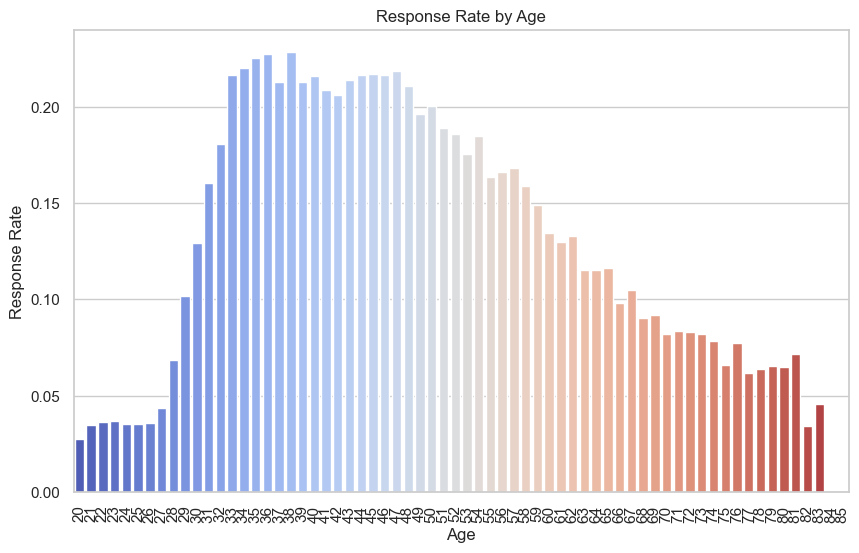

In [52]:
plt.figure(figsize=(10, 6))
age_response = df_train.groupby('Age')['Response'].mean().reset_index()
sns.barplot(x='Age', y='Response', data=age_response, palette='coolwarm')
plt.title('Response Rate by Age')
plt.xlabel('Age')
plt.ylabel('Response Rate')
plt.xticks(rotation=90)
plt.show()

C:\Users\carlo\AppData\Local\Temp\ipykernel_252\2552121666.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Previously_Insured', y='Response', data=insured_response, palette='viridis')


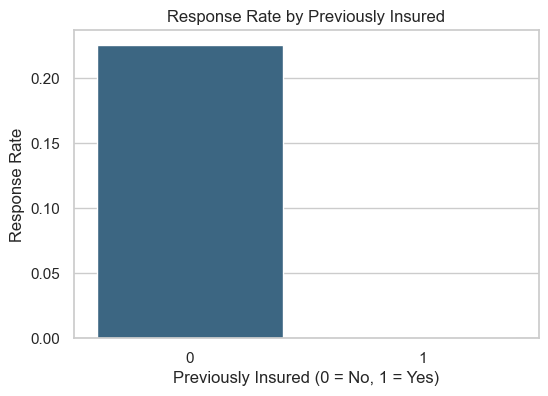

In [53]:
plt.figure(figsize=(6, 4))
insured_response = df_train.groupby('Previously_Insured')['Response'].mean().reset_index()
sns.barplot(x='Previously_Insured', y='Response', data=insured_response, palette='viridis')
plt.title('Response Rate by Previously Insured')
plt.xlabel('Previously Insured (0 = No, 1 = Yes)')
plt.ylabel('Response Rate')
plt.show()

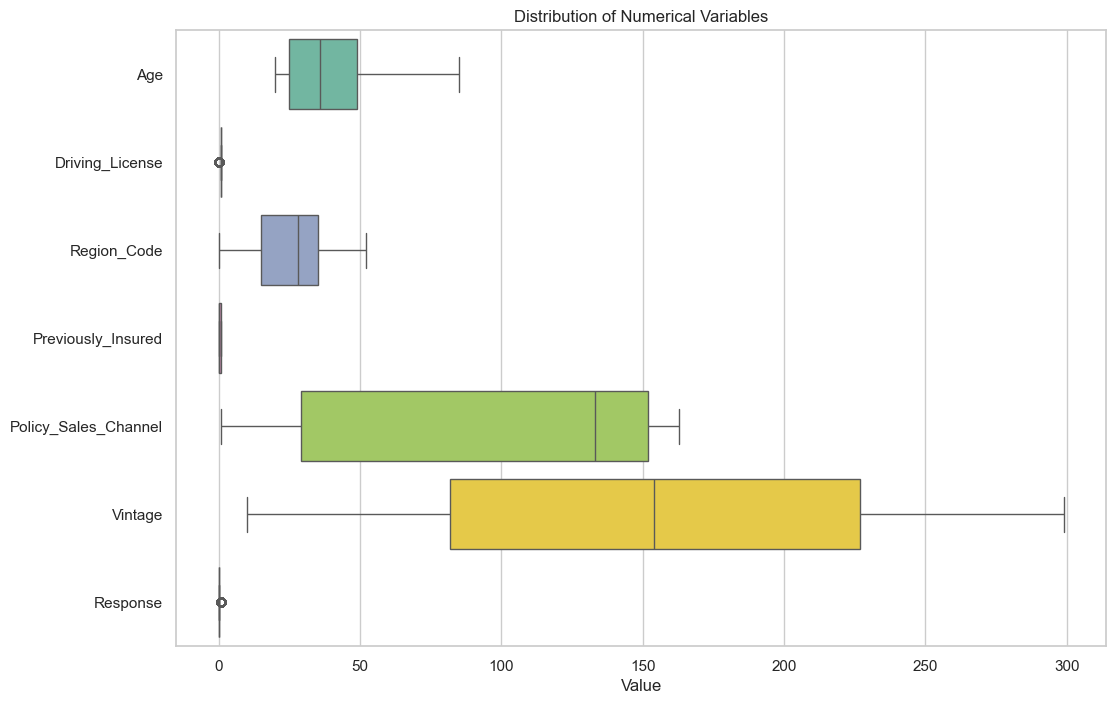

In [54]:
numerical_cols = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
                  'Policy_Sales_Channel', 'Vintage', 'Response']
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_train[numerical_cols], orient='h', palette='Set2')
plt.title('Distribution of Numerical Variables')
plt.xlabel('Value')
plt.show()

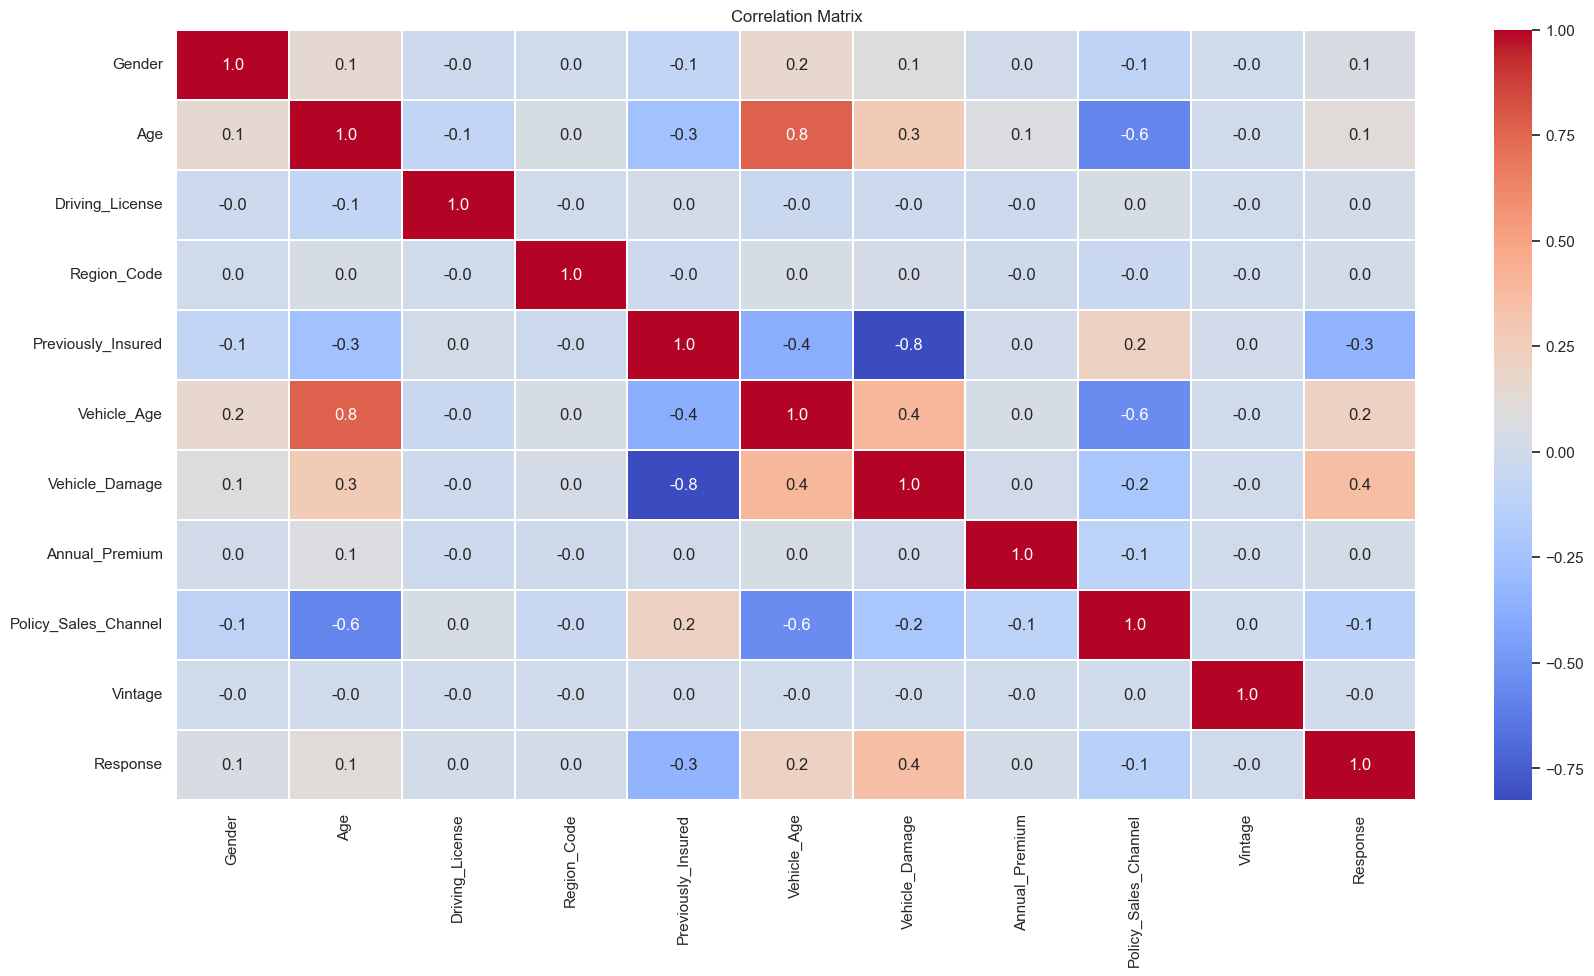

In [55]:
#correlation_matrix = df_train.corr()
correlation_matrix = df_train.select_dtypes(include='number').corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.1)
#plt.gcf().set_facecolor('skyblue')
plt.title('Correlation Matrix')
plt.show()

C:\Users\carlo\AppData\Local\Temp\ipykernel_252\1355361589.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df_train, palette='Set1')
C:\Users\carlo\AppData\Local\Temp\ipykernel_252\1355361589.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Driving_License', data=df_train, palette='Set2')
C:\Users\carlo\AppData\Local\Temp\ipykernel_252\1355361589.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Previously_Insured', data=df_train, palette='Set3')
C:\Users\carlo\AppData\Local\Temp\ipykernel_252\135536158

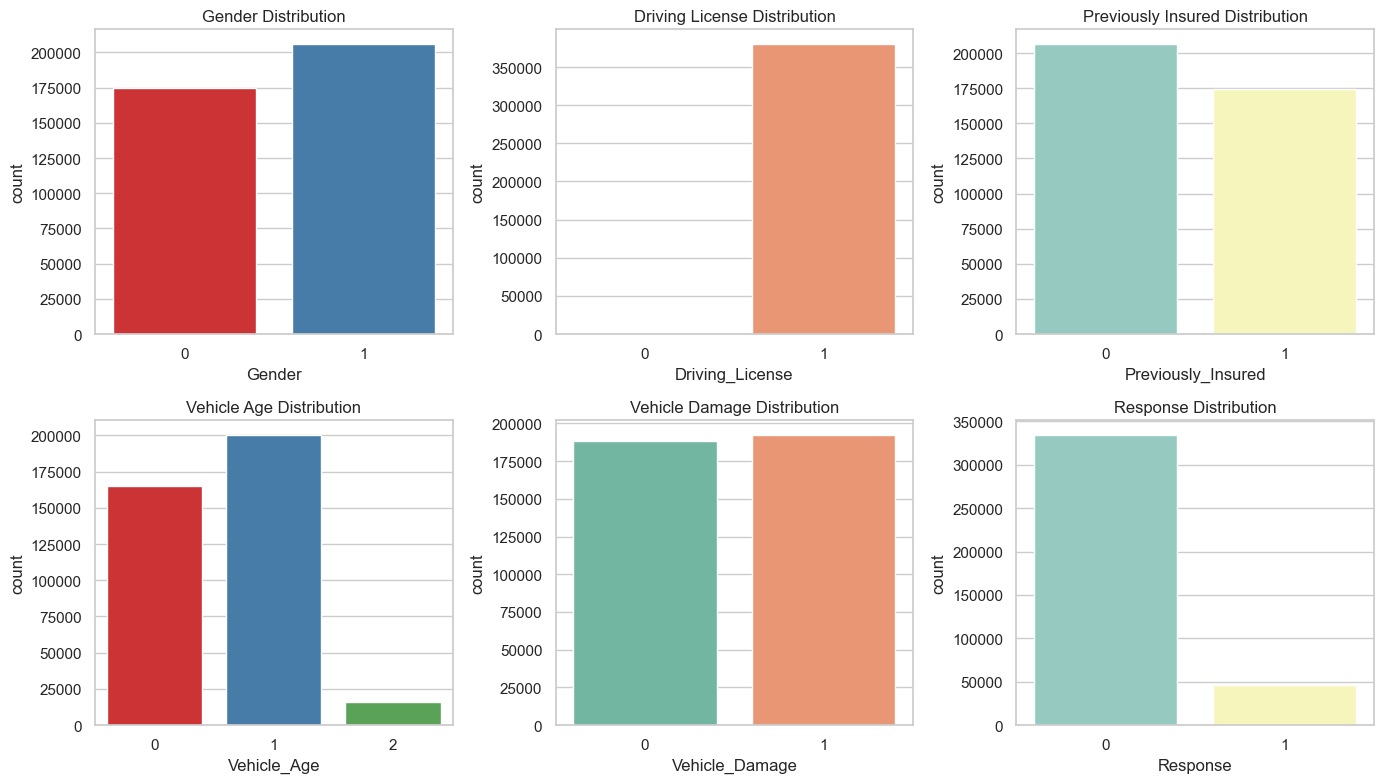

In [56]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
sns.countplot(x='Gender', data=df_train, palette='Set1')
plt.title('Gender Distribution')

plt.subplot(2, 3, 2)
sns.countplot(x='Driving_License', data=df_train, palette='Set2')
plt.title('Driving License Distribution')

plt.subplot(2, 3, 3)
sns.countplot(x='Previously_Insured', data=df_train, palette='Set3')
plt.title('Previously Insured Distribution')

plt.subplot(2, 3, 4)
sns.countplot(x='Vehicle_Age', data=df_train, palette='Set1')
plt.title('Vehicle Age Distribution')

plt.subplot(2, 3, 5)
sns.countplot(x='Vehicle_Damage', data=df_train, palette='Set2')
plt.title('Vehicle Damage Distribution')

plt.subplot(2, 3, 6)
sns.countplot(x='Response', data=df_train, palette='Set3')
plt.title('Response Distribution')

plt.tight_layout()
plt.show()

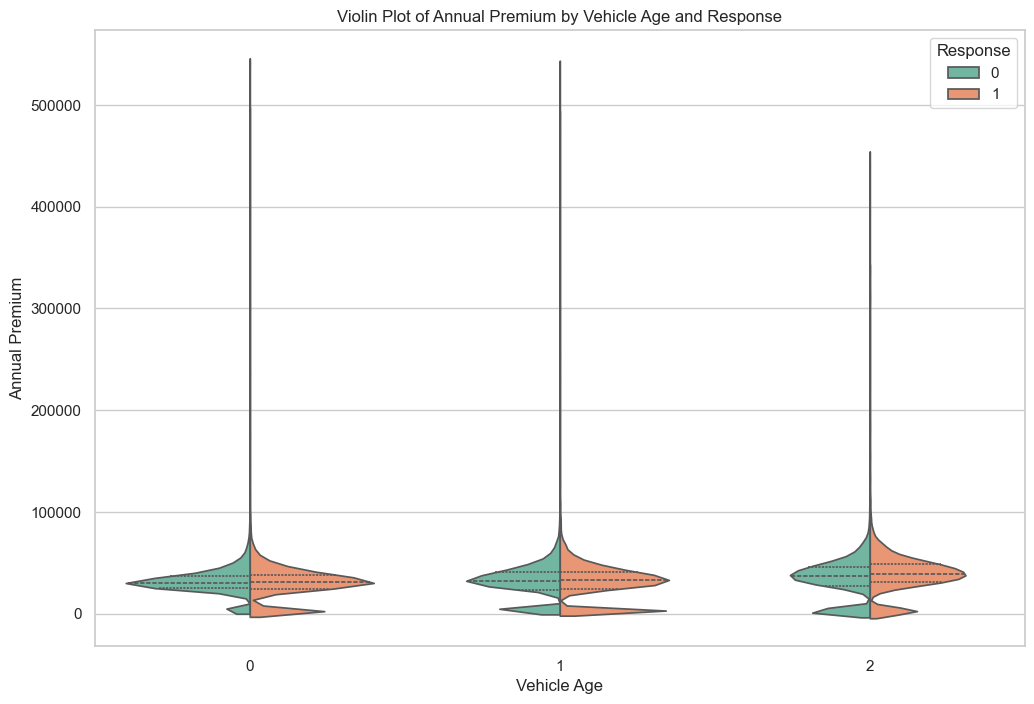

In [57]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Vehicle_Age', y='Annual_Premium', data=df_train, hue='Response', split=True, palette='Set2', inner='quartile')
plt.title('Violin Plot of Annual Premium by Vehicle Age and Response')
plt.xlabel('Vehicle Age')
plt.ylabel('Annual Premium')
plt.show()

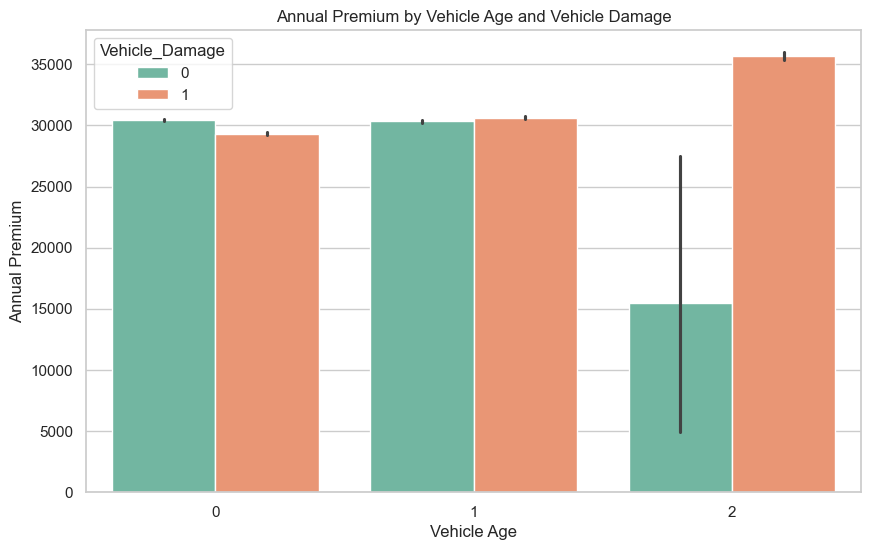

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Vehicle_Age', y='Annual_Premium', hue='Vehicle_Damage', data=df_train, palette='Set2')
plt.title('Annual Premium by Vehicle Age and Vehicle Damage')
plt.xlabel('Vehicle Age')
plt.ylabel('Annual Premium')
plt.show()

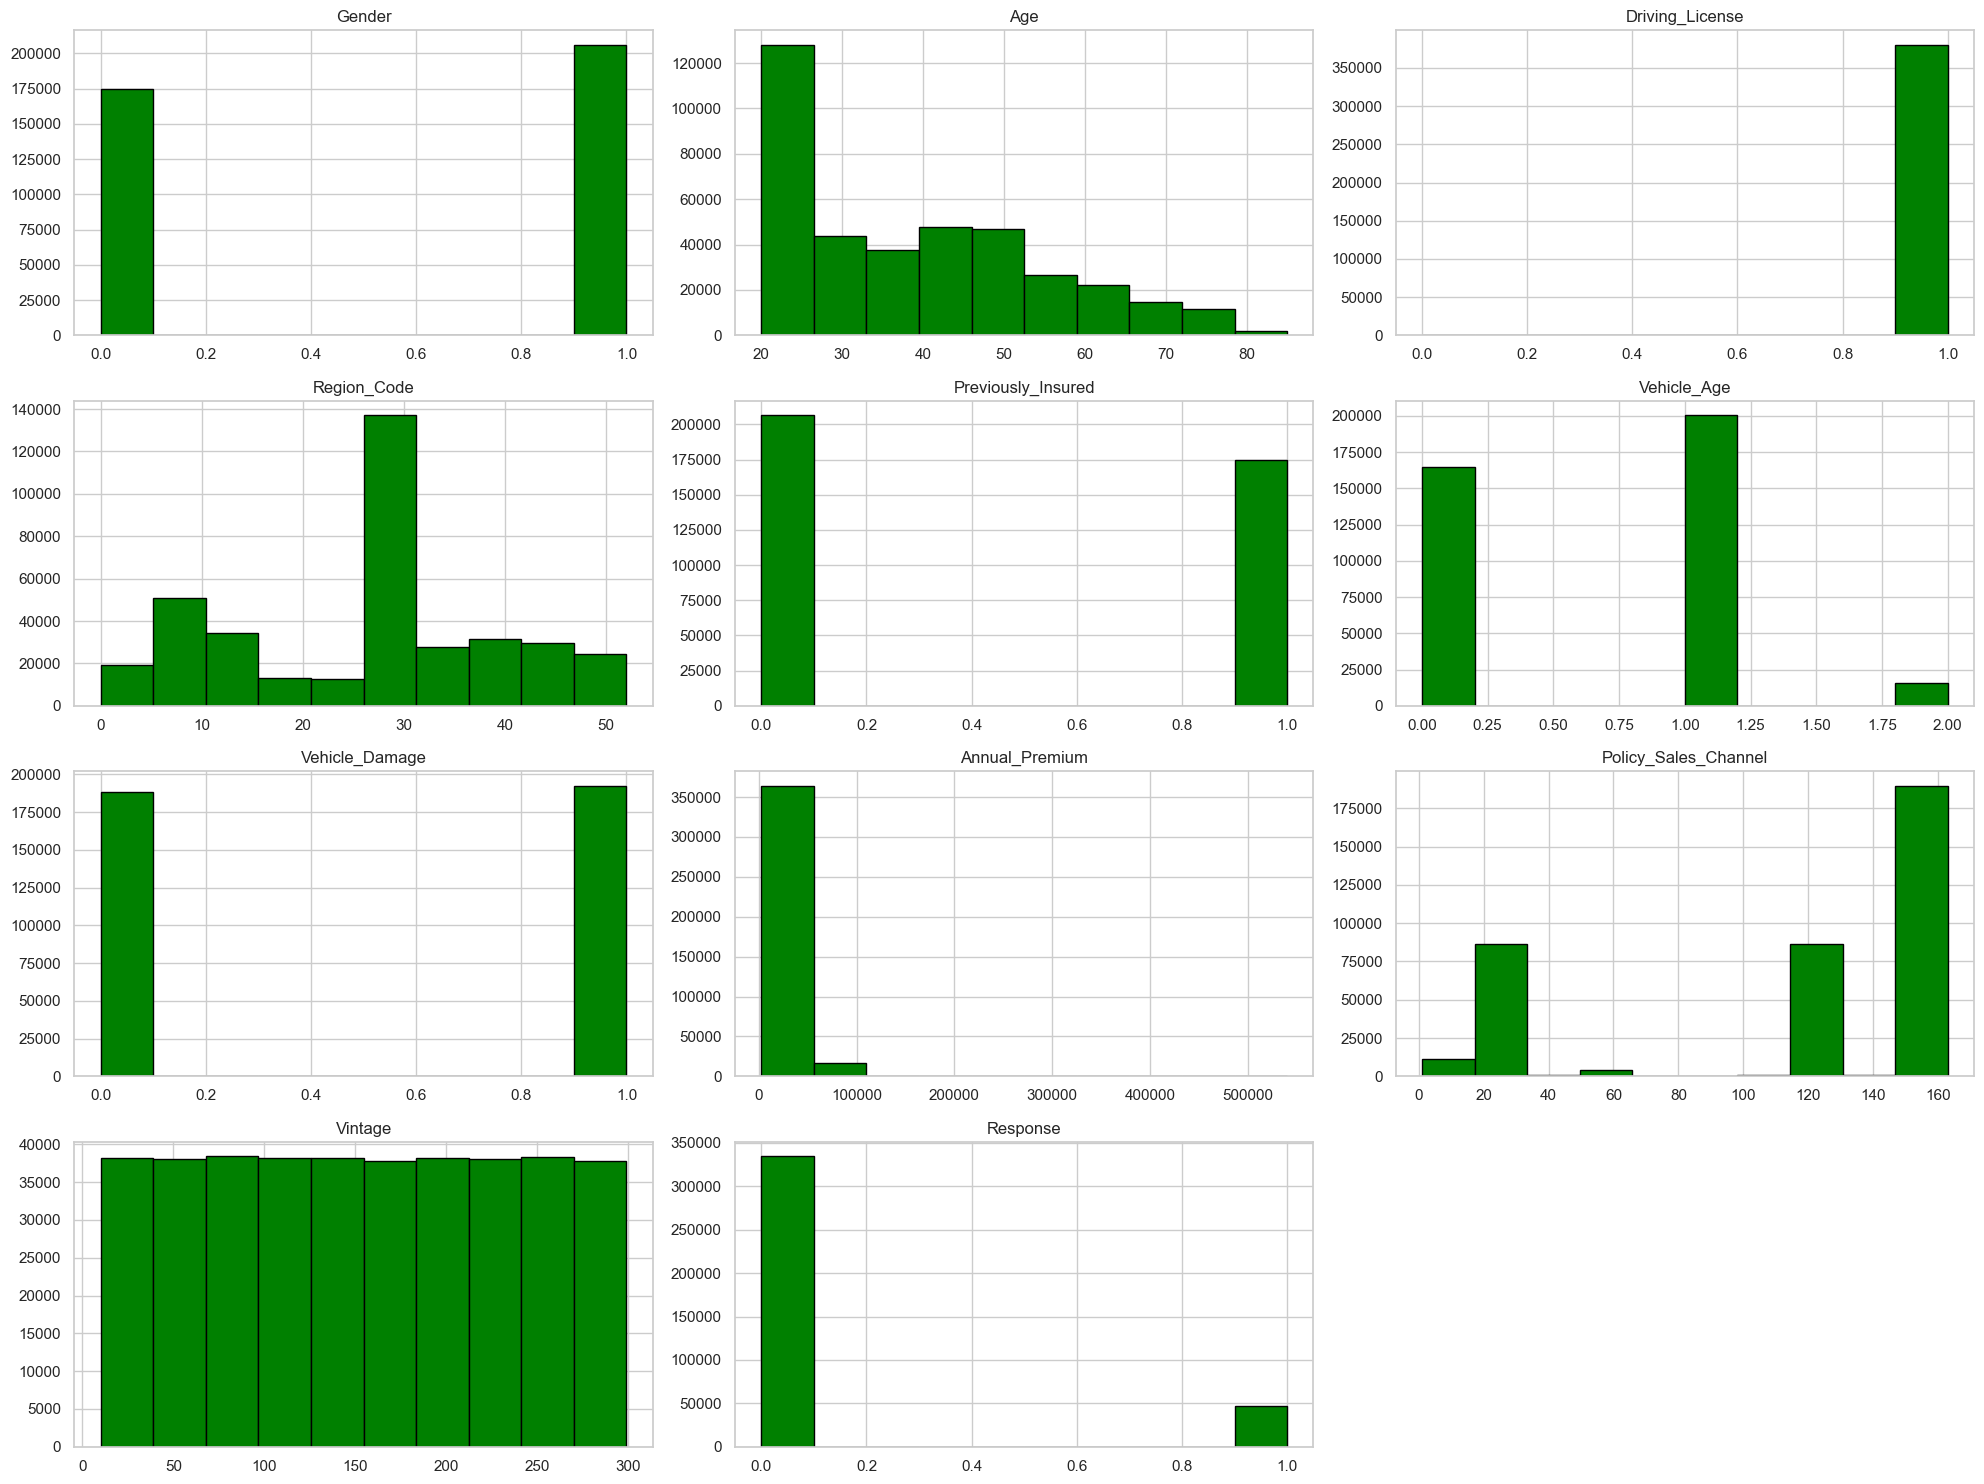

In [59]:
df_train.hist(figsize=(20, 15), color='green', edgecolor='black')
plt.gcf().set_facecolor('white')
plt.tight_layout()
plt.show()

In [60]:
def feature_engineering(df):

    df['Age_Vehicle_Age'] = df['Age'] * df['Vehicle_Age']
    df['Age_Previously_Insured'] = df['Age'] * df['Previously_Insured']
    df['Vehicle_Age_Damage'] = df['Vehicle_Age'] * df['Vehicle_Damage']
    df['Previously_Insured_Damage'] = df['Previously_Insured'] * df['Vehicle_Damage']
    df['Age_squared'] = df['Age'] ** 2
    df['Vehicle_Age_squared'] = df['Vehicle_Age'] ** 2
    df['Annual_Premium_per_Age'] = df['Annual_Premium'] / (df['Age'] + 1)
    return df

#df_train = feature_engineering(df_train)
#df_test = feature_engineering(df_test)

In [61]:
df_test['Gender'] = df_train['Gender'].map({'Male': 1, 'Female': 0})

In [62]:
df_test['Vehicle_Damage'] = df_test['Vehicle_Damage'].map({'Yes': 1, 'No': 0})
df_test['Vehicle_Age'] = df_test['Vehicle_Age'].map({
    '< 1 Year': 0,
    '1-2 Year': 1,
    '> 2 Years': 2
})

In [63]:
df_test.dtypes

Gender                  float64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
dtype: object

In [ ]:
y = df_train['Response']
X = df_train.drop(['Response'],axis=1)

In [65]:
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size = 0.2, random_state =42)


In [66]:
train_X = train_X.to_numpy()
train_y = train_y.to_numpy()
test_X = test_X.to_numpy()
test_y = test_y.to_numpy()

In [67]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score


params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'eta': 0.03,  # Reduced learning rate
    'alpha': 0.1,  # Slightly reduced regularization
    'subsample': 0.851,  # Increased subsample fraction
    'colsample_bytree': 0.45,  # Adjusted colsample_bytree
    'max_depth': 12,  # Reduced max depth
    'min_child_weight': 10,  # Slightly increased to control overfitting
    'gamma': 1e-6,  # Slightly increased gamma
    'random_state': 42,
    'max_bin': 100,  # Reduced max_bin from 50000
    'enable_categorical': True,
    'n_estimators': 100,  # Keep high for early stopping
    'tree_method': 'hist',
    'early_stopping_rounds':50,
    'verbose':50
}
gc.collect()
model = XGBClassifier(**params,device="cuda")
XGB = model.fit(
    train_X,
    train_y,
    eval_set=[(test_X, test_y)]
)

[0]	validation_0-auc:0.84675
[1]	validation_0-auc:0.84066
[2]	validation_0-auc:0.84907


d:\proyectoICSPM\venv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [19:14:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()
d:\proyectoICSPM\venv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [19:14:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()
d:\proyectoICSPM\venv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [19:14:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  self.starting_round = model.num_boosted_rounds()


[3]	validation_0-auc:0.85145
[4]	validation_0-auc:0.85301
[5]	validation_0-auc:0.85350
[6]	validation_0-auc:0.85432
[7]	validation_0-auc:0.85337
[8]	validation_0-auc:0.85396
[9]	validation_0-auc:0.85379
[10]	validation_0-auc:0.85430
[11]	validation_0-auc:0.85492
[12]	validation_0-auc:0.85481
[13]	validation_0-auc:0.85530
[14]	validation_0-auc:0.85552
[15]	validation_0-auc:0.85499
[16]	validation_0-auc:0.85551
[17]	validation_0-auc:0.85550
[18]	validation_0-auc:0.85509
[19]	validation_0-auc:0.85542
[20]	validation_0-auc:0.85548
[21]	validation_0-auc:0.85542
[22]	validation_0-auc:0.85540
[23]	validation_0-auc:0.85530
[24]	validation_0-auc:0.85564
[25]	validation_0-auc:0.85568
[26]	validation_0-auc:0.85584
[27]	validation_0-auc:0.85615
[28]	validation_0-auc:0.85645
[29]	validation_0-auc:0.85652
[30]	validation_0-auc:0.85666
[31]	validation_0-auc:0.85669
[32]	validation_0-auc:0.85677
[33]	validation_0-auc:0.85701
[34]	validation_0-auc:0.85722
[35]	validation_0-auc:0.85727
[36]	validation_0

In [68]:
prediction = XGB.predict(test_X)

In [69]:
print("Best iteration:", model.best_iteration)

Best iteration: 99


In [70]:
val_pred_prob = XGB.predict_proba(test_X)[:, 1]
auc = roc_auc_score(test_y, val_pred_prob)
print(f"Validation AUC: {auc:.5f}")

Validation AUC: 0.85883
